In [23]:
import pandas as pd
import random
import math
from matplotlib.pyplot import *

import scipy
import scipy.signal

import numpy

In [24]:
data = pd.read_csv("result_number_accounts_hour.csv", delimiter =',')
data

,time_slots,ASSEofficiel,OL,ClermontFoot,MontpellierHSC,OM_Officiel,ogcnice,AS_Monaco,estac_officiel,girondins,...,StadeDeReims,FCMetz,RCSA,AngersSCO,FCNantes,staderennais,RCLens,losclive,FCLorient,SB29
0,2022-01-30T12:00:00.000Z,45,372,1,27,331,23,60,16,578,...,7,1,10,1,6,15,39,11,14,14
1,2022-01-30T13:00:00.000Z,61,233,1,50,336,31,57,8,349,...,20,1,15,13,8,4,21,26,9,23
2,2022-01-30T14:00:00.000Z,47,338,1,26,283,14,22,4,187,...,6,1,11,16,1,21,8,28,2,14
3,2022-01-30T15:00:00.000Z,58,469,1,35,171,20,34,14,138,...,6,2,40,59,5,13,11,2,28,23
4,2022-01-30T16:00:00.000Z,191,3513,6,40,168,13,36,36,76,...,6,27,30,12,6,10,13,11,30,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2022-02-28T06:00:00.000Z,45,134,8,2,67,3,13,7,24,...,3,6,21,3,7,0,8,39,18,1
610,2022-02-28T07:00:00.000Z,47,127,5,2,378,11,9,7,31,...,10,9,12,6,10,6,57,64,11,2
611,2022-02-28T08:00:00.000Z,59,195,4,6,240,8,15,19,24,...,10,17,8,11,10,5,105,44,61,11
612,2022-02-28T09:00:00.000Z,91,217,5,1,236,15,39,18,32,...,8,17,24,21,16,38,64,49,99,10


In [25]:
b = data.iloc[:, 0] #reading from column 0
a = pd.to_datetime(b, format='%Y-%m-%dT%H:%M:%S.%fZ', errors='ignore')
data['time'] = a

In [26]:
def plot_df(x, y, xlabel='Date', ylabel='Value', dpi=100):
    figure(figsize=(16,5), dpi=dpi)
    plot(x, y)
    gca().set(xlabel=xlabel, ylabel=ylabel)

In [27]:
list_clubs = list(data.columns[1:-1]) 
list_clubs

['ASSEofficiel',
 'OL',
 'ClermontFoot',
 'MontpellierHSC',
 'OM_Officiel',
 'ogcnice',
 'AS_Monaco',
 'estac_officiel',
 'girondins',
 'psg_inside',
 'StadeDeReims',
 'FCMetz',
 'RCSA',
 'AngersSCO',
 'FCNantes',
 'staderennais',
 'RCLens',
 'losclive',
 'FCLorient',
 'SB29']

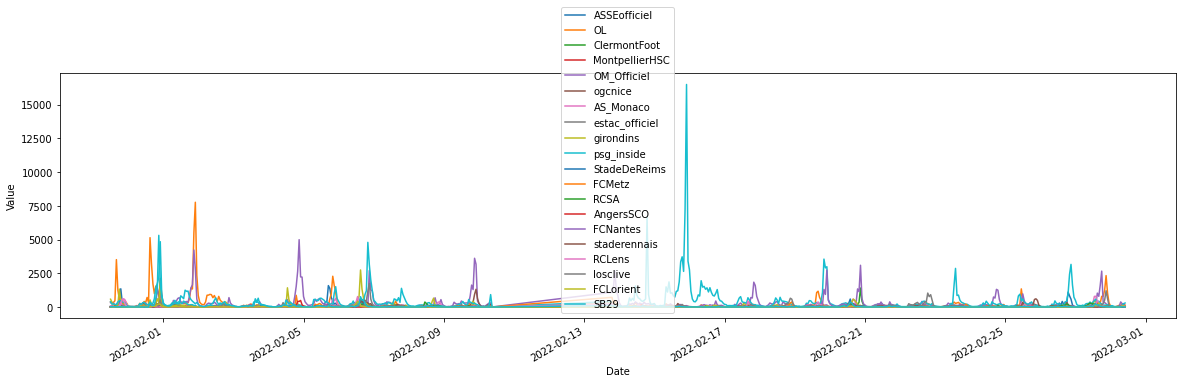

In [28]:
data.plot(x = 'time', y = list_clubs, xlabel='Date', ylabel='Value', figsize=(20,5))
show()

In [29]:
data.describe()

,ASSEofficiel,OL,ClermontFoot,MontpellierHSC,OM_Officiel,ogcnice,AS_Monaco,estac_officiel,girondins,psg_inside,StadeDeReims,FCMetz,RCSA,AngersSCO,FCNantes,staderennais,RCLens,losclive,FCLorient,SB29
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,54.866450,193.662866,16.747557,12.289902,257.874593,44.675896,42.907166,9.381107,83.972313,402.060261,15.184039,22.153094,22.254072,11.048860,31.203583,29.915309,28.131922,56.495114,11.462541,70.131922
std,131.997732,541.260002,72.800604,25.184099,491.808192,125.525678,85.873705,22.839279,188.640031,945.755348,36.678360,48.786240,41.621466,38.278036,132.898197,66.671379,64.994294,136.911704,33.647744,267.808660
min,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,28.000000,1.000000,1.000000,62.000000,5.000000,8.000000,1.000000,13.000000,78.000000,2.000000,3.000000,3.000000,0.000000,3.000000,3.250000,3.250000,7.250000,1.000000,3.000000
50%,24.000000,70.000000,4.000000,5.000000,129.500000,17.500000,23.000000,3.000000,40.000000,180.000000,6.000000,9.000000,8.000000,3.000000,9.500000,12.000000,11.500000,22.000000,3.000000,12.000000
75%,53.750000,152.000000,11.000000,13.000000,230.000000,40.000000,43.000000,9.000000,79.000000,367.250000,14.000000,22.000000,23.000000,8.000000,24.000000,27.750000,27.000000,50.750000,10.000000,39.750000
max,1587.000000,7764.000000,1406.000000,301.000000,4991.000000,2119.000000,794.000000,242.000000,2746.000000,16494.000000,521.000000,715.000000,369.000000,486.000000,2734.000000,636.000000,774.000000,1729.000000,412.000000,5312.000000


In [30]:
data['OL'].quantile(0.25)

28.0

In [31]:
moyenne_per_club = []
third_quartile_per_club = []
mean_plus_sigma = []
mean_plus_two_sigmas = []

for club in list_clubs:
    moyenne = data[club].mean()
    moyenne_per_club.append(moyenne)
    third_quartile_per_club.append(data[club].quantile(0.75))
    mean_plus_sigma.append(moyenne + data[club].std())
    mean_plus_two_sigmas.append(moyenne + 2*data[club].std())

print("moyenne: ",moyenne_per_club)
print("\n3ème quartile: ",third_quartile_per_club)
print("\nm + sigma: ",mean_plus_sigma)
print("\nm + 2*sigma: ",mean_plus_two_sigmas)

moyenne:  [54.86644951140065, 193.6628664495114, 16.747557003257327, 12.289902280130294, 257.87459283387625, 44.67589576547231, 42.9071661237785, 9.381107491856678, 83.97231270358306, 402.0602605863192, 15.184039087947882, 22.153094462540718, 22.254071661237784, 11.04885993485342, 31.20358306188925, 29.91530944625407, 28.131921824104236, 56.495114006514655, 11.462540716612377, 70.13192182410424]

3ème quartile:  [53.75, 152.0, 11.0, 13.0, 230.0, 40.0, 43.0, 9.0, 79.0, 367.25, 14.0, 22.0, 23.0, 8.0, 24.0, 27.75, 27.0, 50.75, 10.0, 39.75]

m + sigma:  [186.86418200996803, 734.9228688825918, 89.54816147854014, 37.47400085835248, 749.6827845723731, 170.20157347277723, 128.7808708433607, 32.22038638667752, 272.6123435092822, 1347.8156090093305, 51.862399555162156, 70.93933475252588, 63.87553770065726, 49.32689605570337, 164.10178001678312, 96.5866882422308, 93.12621589330251, 193.40681847736184, 45.110285052861556, 337.940582046171]

m + 2*sigma:  [318.86191450853545, 1276.1828713156724, 16

In [32]:
dict_moy_per_club = dict(zip(list_clubs, moyenne_per_club))
dict_moy_per_club

{'ASSEofficiel': 54.86644951140065,
 'OL': 193.6628664495114,
 'ClermontFoot': 16.747557003257327,
 'MontpellierHSC': 12.289902280130294,
 'OM_Officiel': 257.87459283387625,
 'ogcnice': 44.67589576547231,
 'AS_Monaco': 42.9071661237785,
 'estac_officiel': 9.381107491856678,
 'girondins': 83.97231270358306,
 'psg_inside': 402.0602605863192,
 'StadeDeReims': 15.184039087947882,
 'FCMetz': 22.153094462540718,
 'RCSA': 22.254071661237784,
 'AngersSCO': 11.04885993485342,
 'FCNantes': 31.20358306188925,
 'staderennais': 29.91530944625407,
 'RCLens': 28.131921824104236,
 'losclive': 56.495114006514655,
 'FCLorient': 11.462540716612377,
 'SB29': 70.13192182410424}

In [33]:
list_clubs

['ASSEofficiel',
 'OL',
 'ClermontFoot',
 'MontpellierHSC',
 'OM_Officiel',
 'ogcnice',
 'AS_Monaco',
 'estac_officiel',
 'girondins',
 'psg_inside',
 'StadeDeReims',
 'FCMetz',
 'RCSA',
 'AngersSCO',
 'FCNantes',
 'staderennais',
 'RCLens',
 'losclive',
 'FCLorient',
 'SB29']

In [34]:
def generate_information(list_input_dict, tweets_number,club, range, over_tweets):
    if tweets_number > list_input_dict[club] :
        information = [club, data['time'][range], tweets_number/list_input_dict[club]]
        over_tweets.append(information)
    

In [35]:
#depending on the argument, will return the threshold of mean * x, 3rd quartile, m + sigma or m + 2*sigma

def generate_over_tweets_seuil(seuil):  #if -3: third quartile;  if -2: m + sigma;    if if -1: m + 2*sigma;    else: mean*x
    over_tweets = []
    for club in list_clubs:
        for i in range(0, data[club].shape[0]):
            tweets_number = data[club][i]
            if seuil == -3:
                dict_third_quartile_per_club = dict(zip(list_clubs, third_quartile_per_club))
                generate_information(dict_third_quartile_per_club, tweets_number,club, i, over_tweets)
                '''
                if tweets_number > dict_third_quartile_per_club[club] :
                    information = [club, data['time'][i], tweets_number/dict_moy_per_club[club]]
                    over_tweets.append(information)
                '''
            elif seuil == -2:
                dict_mean_plus_sigma_per_club = dict(zip(list_clubs, mean_plus_sigma))
                generate_information(dict_mean_plus_sigma_per_club, tweets_number,club, i, over_tweets)
            elif seuil == -1:
                dict_mean_plus_two_sigmas_per_club = dict(zip(list_clubs, mean_plus_two_sigmas))
                generate_information(dict_mean_plus_two_sigmas_per_club, tweets_number,club, i, over_tweets)
            else:
                dict_moy_per_club = dict(zip(list_clubs, moyenne_per_club))
                generate_information(dict_moy_per_club, tweets_number,club, i, over_tweets)
    #print(len(over_tweets))
    return over_tweets

In [36]:
generate_over_tweets_seuil(-1)

[['ASSEofficiel', Timestamp('2022-01-30 19:00:00'), 4.233807609418536],
 ['ASSEofficiel', Timestamp('2022-01-30 20:00:00'), 1.0882453633098015],
 ['ASSEofficiel', Timestamp('2022-01-31 15:00:00'), 1.3015038206731055],
 ['ASSEofficiel', Timestamp('2022-02-05 15:00:00'), 1.1886022844219446],
 ['ASSEofficiel', Timestamp('2022-02-05 16:00:00'), 1.2952315131035965],
 ['ASSEofficiel', Timestamp('2022-02-05 17:00:00'), 4.977076056405346],
 ['ASSEofficiel', Timestamp('2022-02-05 18:00:00'), 4.3122114540373975],
 ['ASSEofficiel', Timestamp('2022-02-05 19:00:00'), 2.1357207274177945],
 ['ASSEofficiel', Timestamp('2022-02-05 20:00:00'), 1.3924522804309851],
 ['ASSEofficiel', Timestamp('2022-02-20 14:00:00'), 1.850330733005138],
 ['ASSEofficiel', Timestamp('2022-02-26 15:00:00'), 1.3015038206731055],
 ['ASSEofficiel', Timestamp('2022-02-26 19:00:00'), 3.4654499321536902],
 ['ASSEofficiel', Timestamp('2022-02-26 20:00:00'), 2.5873268724224388],
 ['ASSEofficiel', Timestamp('2022-02-26 21:00:00'), 1.

In [66]:
import http.client
import json
import pandas
import numpy

journee=26
connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': 'd244615bf85e4354860c825eee0b4c12' }
connection.request('GET', '/v2/competitions/FL1/matches?matchday='+str(journee), None, headers)
response = json.loads(connection.getresponse().read().decode())

Match=[]

for k in range(len(response["matches"])):
  date=response['matches'][k]['utcDate']
  year=int(date[:4])
  month=int(date[5:7])
  day=int(date[8:10])
  hour=int(date[11:13])+1
  minute=int(date[14:16])
  d1=response['matches'][k]['homeTeam']['name']
  e1=response['matches'][k]['awayTeam']['name']
  Match.append([d1,e1,year,month,day,hour,minute])

  #print(response['matches'][k].keys())
ar = numpy.array(Match)
df = pandas.DataFrame(ar,columns=['Domicile','Extérieur','Année','Mois','Jour','Heure','Minute'])
df

,Domicile,Extérieur,Année,Mois,Jour,Heure,Minute
0,Montpellier HSC,Stade Rennais FC 1901,2022,2,25,21,0
1,RC Strasbourg Alsace,OGC Nice,2022,2,26,17,0
2,Paris Saint-Germain FC,AS Saint-Étienne,2022,2,26,21,0
3,AS Monaco FC,Stade de Reims,2022,2,27,13,5
4,FC Metz,FC Nantes,2022,2,27,15,0
5,Clermont Foot 63,FC Girondins de Bordeaux,2022,2,27,15,0
6,Stade Brestois 29,FC Lorient,2022,2,27,15,0
7,Angers SCO,Racing Club de Lens,2022,2,27,15,0
8,ES Troyes AC,Olympique de Marseille,2022,2,27,17,5
9,Olympique Lyonnais,Lille OSC,2022,2,27,20,45


In [67]:
list(df['Jour'].values)

['25', '26', '26', '27', '27', '27', '27', '27', '27', '27']

In [68]:
def math_the_most(seuil):
    time_done = []
    the_most = []
    over_tweets = generate_over_tweets_seuil(seuil)
    for day in list(df['Jour'].values):
        all_in_day = []
        date = datetime(int(df.loc[0][2]), int(df.loc[0][3]), day)
        date_transfo = datetime.strftime(date, "%Y-%m-%d %H:%M:%S")
        for value in over_tweets:
            if str(value[1])[0:10] == date_transfo[0:10]:
                all_in_day.append(value)

In [69]:
##Matching between name of club and account
clubs = open("list_clubs" + ".txt", 'r', encoding='utf-8')
clubs_accounts = open("list_clubs_compte" + ".txt", 'r', encoding='utf-8')

list_names_clubs = [club.strip()for club in clubs.readlines()]
list_names_clubs_accounts = [club_account.strip() for club_account in clubs_accounts.readlines()]
clubs.close()
clubs_accounts.close()


matching = dict(zip(list_names_clubs, list_names_clubs_accounts))
matching

{'AS Saint-Étienne': 'ASSEofficiel',
 'Olympique Lyonnais': 'OL',
 'Clermont Foot 63': 'ClermontFoot',
 'Montpellier HSC': 'MontpellierHSC',
 'Olympique de Marseille': 'OM_Officiel',
 'OGC Nice': 'ogcnice',
 'AS Monaco FC': 'AS_Monaco',
 'ES Troyes AC': 'estac_officiel',
 'FC Girondins de Bordeaux': 'girondins',
 'Paris Saint-Germain FC': 'psg_inside',
 'Stade de Reims': 'StadeDeReims',
 'FC Metz': 'FCMetz',
 'RC Strasbourg Alsace': 'RCSA',
 'Angers SCO': 'AngersSCO',
 'FC Nantes': 'FCNantes',
 'Stade Rennais FC 1901': 'staderennais',
 'Racing Club de Lens': 'RCLens',
 'Lille OSC': 'losclive',
 'FC Lorient': 'FCLorient',
 'Stade Brestois 29': 'SB29'}

In [70]:
df.loc[9][0]

'Olympique Lyonnais'

In [71]:
from datetime import datetime
my_string = str(data['time'][20])
print(my_string)
my_date = datetime.strptime(my_string, "%Y-%m-%d %H:%M:%S")
my_date.day

2022-01-31 08:00:00


31

In [72]:
from datetime import datetime
date = datetime(2022,2,4,8)
my_date = datetime.strftime(date, "%Y-%m-%d %H:%M:%S")
str(my_date)[0:10]

'2022-02-04'

In [73]:
df.shape[0]

10

In [74]:
def matches_check(seuil):
    ##Check if for matches there is more tweets
    success = []
    over_tweets = generate_over_tweets_seuil(seuil)
    for i in range (0, df.shape[0]):
        date = datetime(int(df.loc[i][2]), int(df.loc[i][3]), int(df.loc[i][4]), int(df.loc[i][5]))
        date_transfo = datetime.strftime(date, "%Y-%m-%d %H:%M:%S")
        j = 0
        team_1_found = False
        team_2_found = False
        while j < len(over_tweets) and not (team_1_found and team_2_found):
        #for element in over_tweets:
            if (not team_1_found and over_tweets[j][0] == matching[df.loc[i][0]] and str(over_tweets[j][1])[0:10] == date_transfo[0:10]):    #if the tweet concerns the club which plays at domicile and the day corresponds
                success.append(1)
                team_1_found = True
            else:
                success.append(0)
        #for element in over_tweets:
            if (not team_2_found and over_tweets[j][0] == matching[df.loc[i][1]] and str(over_tweets[j][1])[0:10] == date_transfo[0:10]):    #if the tweet concerns the club which plays at domicile and the day corresponds
                success.append(1)
                team_2_found = True

            else:
                success.append(0)
            j += 1

    print("Seuil : " + str(seuil) + ",    Matchs repérés : " + str(sum(success)) + ",     Correspondance : " + str(sum(success)/df.shape[0]*50) + "% des matchs")


In [75]:
matches_check(2)

Seuil : 2,    Matchs repérés : 20,     Correspondance : 100.0% des matchs


In [76]:
import numpy as np

#if -3: third quartile;  if -2: m + sigma;    if if -1: m + 2*sigma;    else: mean*x
values_seuil = np.arange(-3,10,1)
for value in values_seuil:
    matches_check(value)

Seuil : -3,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : -2,    Matchs repérés : 19,     Correspondance : 95.0% des matchs
Seuil : -1,    Matchs repérés : 17,     Correspondance : 85.0% des matchs
Seuil : 0,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 1,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 2,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 3,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 4,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 5,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 6,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 7,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 8,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 9,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
